In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] =  1.6

In [2]:
EVAL_DIR = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/eval'

In [20]:
rr_df =  pd.read_csv(os.path.join(EVAL_DIR, 'rr_queries3_model_roberta_400_2020-03-20_13-50.csv'))

In [21]:
rr_df.describe()

,qid,original,degree_2,degree_3,degree_4,degree_4_split,degree_8,degree_8_split,original_irrelevant
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,0.307461,0.141358,0.120469,0.110547,0.121011,0.086105,0.107806,0.081460
std,115.614301,0.335706,0.094870,0.082286,0.070994,0.090857,0.062953,0.079437,0.038295
min,0.000000,0.025000,0.029909,0.031704,0.036038,0.029640,0.028345,0.032273,0.032126
25%,99.750000,0.071429,0.071754,0.061601,0.061726,0.059236,0.047156,0.053051,0.046647
50%,199.500000,0.142857,0.114157,0.093639,0.087608,0.086413,0.065259,0.075328,0.070542
75%,299.250000,0.500000,0.174926,0.144504,0.137302,0.150943,0.093689,0.130919,0.114418
max,399.000000,1.000000,0.473958,0.436905,0.426339,0.489583,0.348155,0.421131,0.180504


In [22]:
def calc_mean_diff(rr_df,
              types_1=['original'],
              types_2=['degree_2', 'degree_3', 'degree_4', 'degree_4_split', 'degree_8', 'degree_8_split']):

    rr_described = rr_df.describe()
    types_1_mean = np.mean(rr_described.loc['mean',types_1].values)
    types_2_mean = np.mean(rr_described.loc['mean',types_2].values)
    return types_1_mean - types_2_mean


print(calc_mean_diff(rr_df))
print(calc_mean_diff(rr_df, types_2=['degree_2']))

0.192911601451552
0.16610292400258284


In [15]:
def rename_types_dict(name):
    if name == 'original':
        return 'rel_original'
    elif name == 'original_irrelevant':
        return 'irrel_original'    
    m = re.match("(degree_)([\d]+)", name)
    if not m:
        raise Exception("Unknown column name '" + name + "'")
    number = m.group(2)
    if name.endswith('split'):
        return 'rel_degree_' + str(number) + '_split'
    return 'rel_degree_' + str(number)

In [16]:
def make_mrr_boxplots(data, cols, id_vars=['qid'], ylabel='MRR', xlabel='document type', title='',
                      figsize=(8,8)):
    
    fig = plt.figure(figsize=figsize)
    
    data_melted = pd.melt(data, id_vars=['qid'], value_vars=cols)
    
    ax = sns.boxplot(x="variable", y="value", data=data_melted, palette="colorblind", showmeans=True,
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(plt.xticks()[0], [rename_types_dict(x) for x in cols])


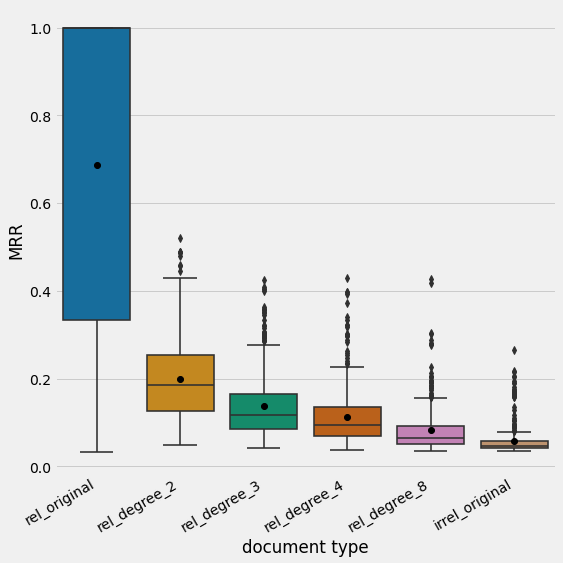

In [17]:
cols = ['original'] + \
       [x for x in rr_df.columns if x.startswith('degree_') and not x.endswith('split')] + \
       ['original_irrelevant']
make_mrr_boxplots(rr_df, cols)

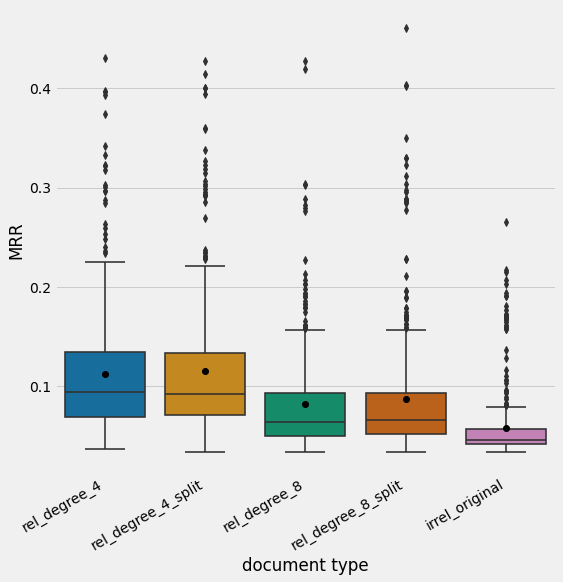

In [19]:
cols =  \
       ['degree_4', 'degree_4_split'] +\
       ['degree_8', 'degree_8_split'] + \
       ['original_irrelevant']


make_mrr_boxplots(rr_df, cols)